#### PCA

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

In [55]:
# I am getting the data from tensorflow
from tensorflow.examples.tutorials.mnist import input_data

In [56]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1099b3c88>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11aaf13c8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x119e294a8>)


In [57]:
data = mnist.train.images
print(data.shape)

(55000, 784)


In [59]:
data_to_visualize = np.reshape(data, (data.shape[0], 28, 28))
#print(data_new.shape)
#print(data_new[0])

In [77]:
def visualize(data, num):
    a = int(num**0.5)
    b = a
    fig, ax = plt.subplots(a,b,figsize=(20,20))
    x = 0
    y = 0
    for i in range(0, num):
        ax[x,y].imshow(data[i], cmap='gray')
        if y == a-1:
            x += 1
            y = 0
        else:
            y += 1
    plt.show()        
    

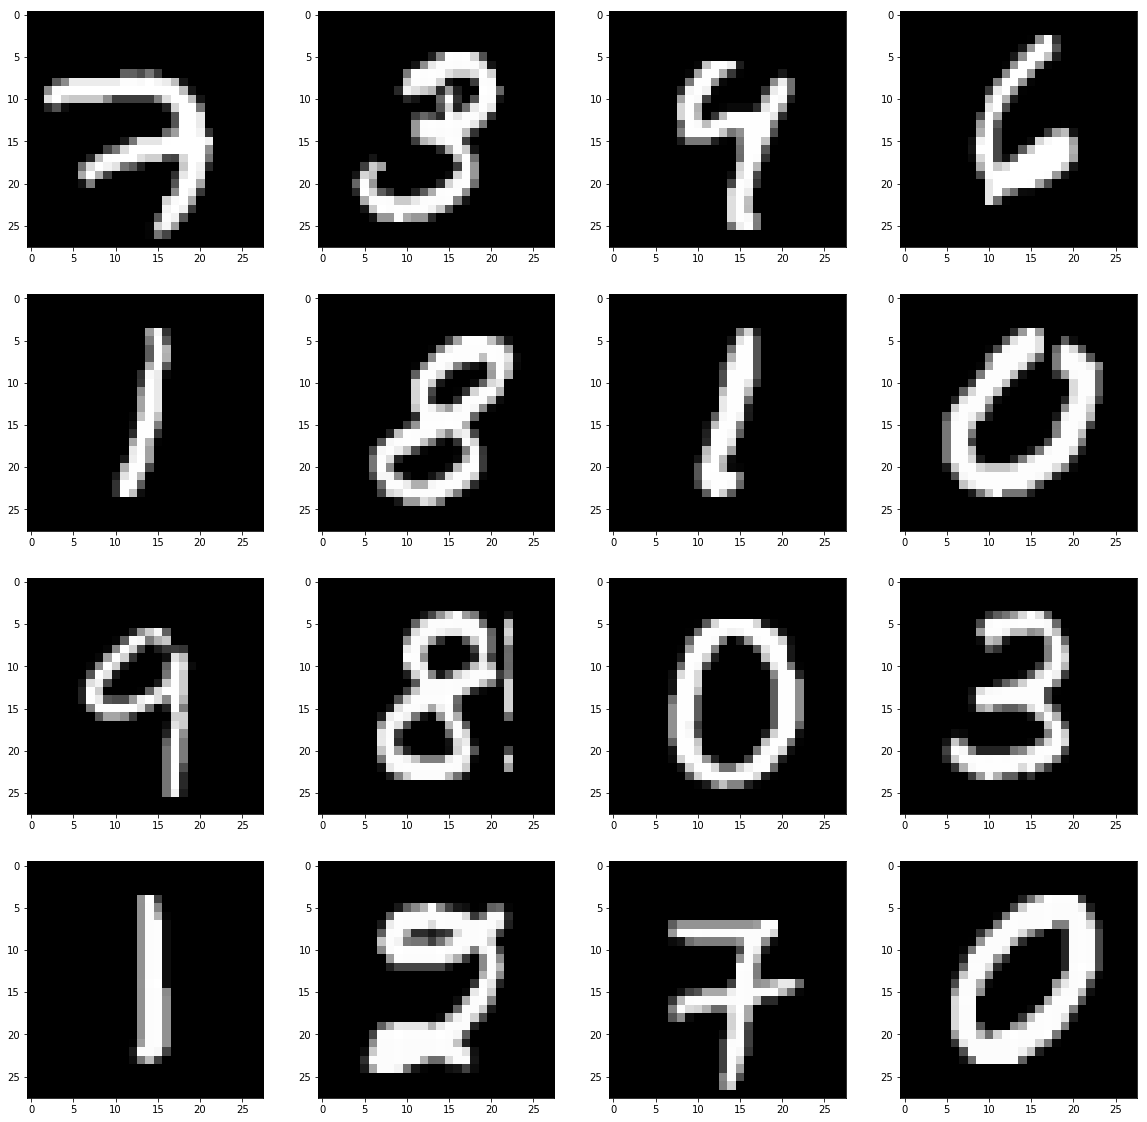

In [79]:
visualize(data_to_visualize, 16)

In [66]:
def PCA(data, components):
    data_copy = data.copy()
    data_copy -= data_copy.mean(axis=0)
    mean_data = data_copy
    cov_matrix = np.cov(mean_data, rowvar=False)
    evals, evecs = la.eigh(cov_matrix)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :components]
    new_pca_data = np.dot(evecs.T, data_copy.T).T
    return new_pca_data, evecs, evals

In [67]:
new_pca_data, evecs, evals = PCA(data, 10)

(55000, 10)
(784, 10)


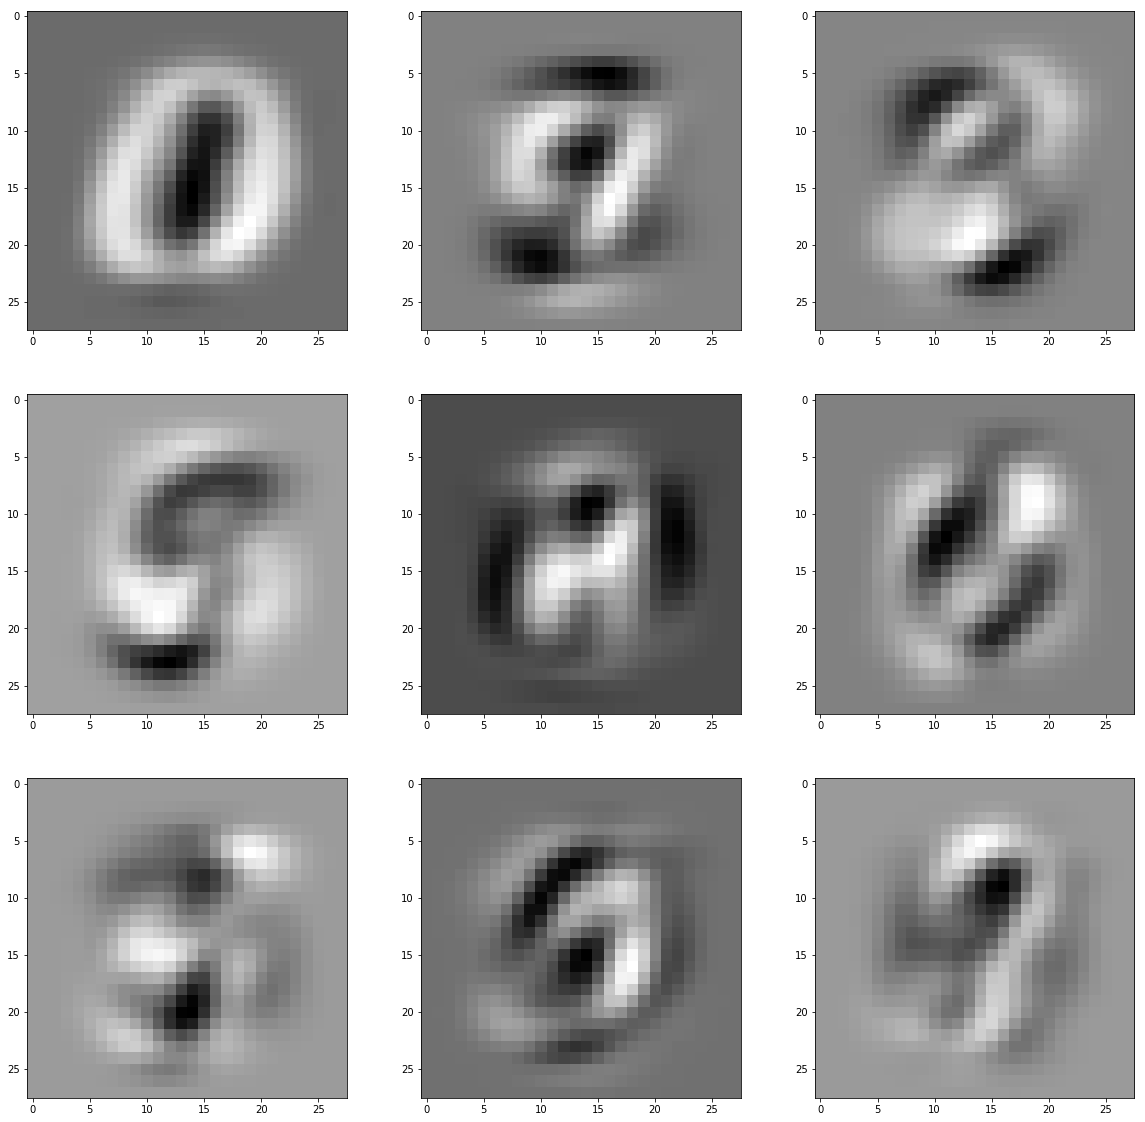

In [80]:
print(new_pca_data.shape)
print(evecs.shape)
visualize(np.reshape(evecs.T, (evecs.shape[1], 28, 28)), 9)

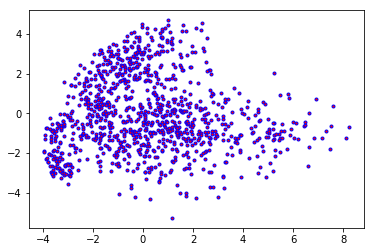

In [81]:
new_pca_data1 = new_pca_data.copy()
new_pca_data1 += new_pca_data1.mean(axis=0)
plt.plot(new_pca_data1[0:1000, 0], new_pca_data1[0:1000, 1], '.', mfc='red', mec='blue')
plt.show()

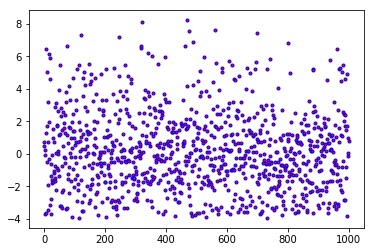

In [82]:
plt.plot(new_pca_data1[0:1000, 0], '.', mfc='red', mec='blue')
plt.show()

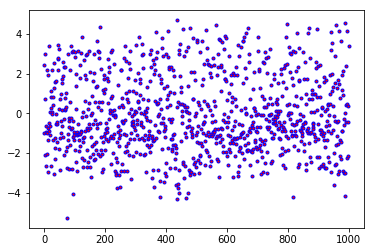

In [83]:
plt.plot(new_pca_data1[0:1000, 1], '.', mfc='red', mec='blue')
plt.show()